# Titanikte Hayatta kalanları tahmin eden model- CLASSİFİCATİON

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df1=pd.read_csv("train.csv")

In [5]:
df2=pd.read_csv("test.csv")

In [7]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA - Exploratary Data Analysis

In [8]:
df1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C


In [9]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# DRY Dont repeat yuorself-Bir işi iki sefer yapma

In [13]:
df1.shape,df2.shape

#df2 11 sütun var. df1 e göre 1 tane eksik. bziden bunu tahmin etmemiz isteniyor

((891, 12), (418, 11))

In [14]:
df=df1.append(df2)


#df=pd.concat([df1,df2])    gelecekte bu şekilde birleştirme yapılacakmış

C:\Users\user\AppData\Local\Temp\ipykernel_1476\539546556.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [15]:
df.info()

#ikisini birleştirdik ve tek bir df oldu
#veri sayısı 1309 a çıktı

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
df["Fare"].mean(),df["Fare"].min(),df["Fare"].max(),df["Fare"].std()

(33.29547928134557, 0.0, 512.3292, 51.75866823917414)

In [18]:
# fillna boş olan veriyi doldurur

In [19]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

<Axes: xlabel='Embarked', ylabel='count'>

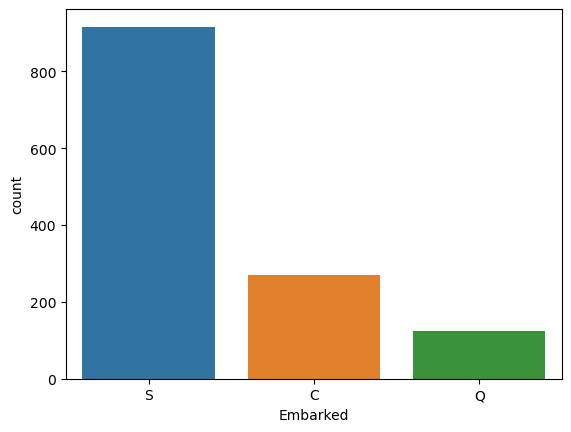

In [27]:
sns.countplot(x=df["Embarked"])

<Axes: xlabel='Embarked', ylabel='count'>

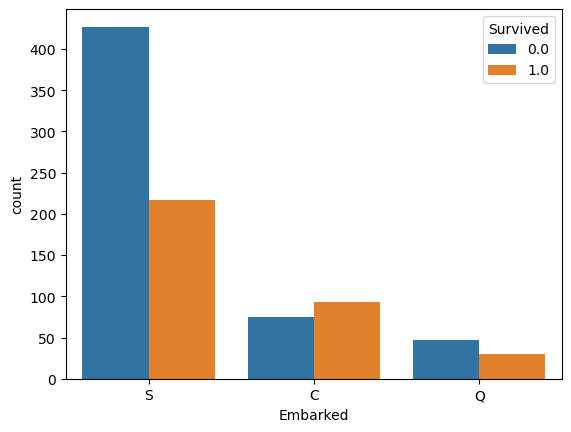

In [20]:
sns.countplot(x=df["Embarked"],hue=df["Survived"])

In [21]:
df["Embarked"].value_counts(normalize=True)
#limandan binme yüzdeleri

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [22]:
df["Embarked"].value_counts() #hangi limandan kaç kişi bindi

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [23]:
df["Embarked"].mode()

#S    0.699311 çoğunlukla S limanından bindiği için onunla doldurduk

0    S
Name: Embarked, dtype: object

In [24]:
df["Embarked"]=df["Embarked"].fillna('S')
#df["Embarked"].fillna('S')

In [25]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [28]:
df.shape

(1309, 12)

In [30]:
#del df['Cabin'] #bu kodu çalıştırdıktan sonra başına # koyduk. tekrar çalıştırırsak hata verir diye
df.drop('Cabin',axis=1,inplace=True) #axis=0 satır siliyor-axis=1 sütun siliyor

#inplace=True yazmazsak verinin kopyasını oluşturup orada siliyor


In [31]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [32]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
279,1171,NaN,2,"Oxenham, Mr. Percy Thomas",male,22.0,0,0,W./C. 14260,10.50,S
510,511,1.0,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.75,Q
143,144,0.0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.75,Q
257,1149,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.05,S
385,1277,NaN,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.00,S


### Feature Engineering- öznitelik mühendisliği veride olmayıp sonradan üretilen sütunlar

In [33]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=True) #ilk boşluğu buldu ve arasındaki harflari aldı

#string= metin yazı - sözel veri
#extract = çıkarma işlemini yapan

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [35]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [36]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [37]:
df["Title"]=df["Title"].replace(['Ms','Mlle'],'Miss')
df["Title"]=df["Title"].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df["Title"]=df["Title"].replace(['Rev','Jonkheer','Don','Sir','Major','Dr','Capt','Col'],'Mr')

In [39]:
del df['Name']

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [41]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [42]:
df[df['Age']<18]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
7,8,0.0,3,male,2.0,3,1,349909,21.0750,S,Master
9,10,1.0,2,female,14.0,1,0,237736,30.0708,C,Mrs
10,11,1.0,3,female,4.0,1,1,PP 9549,16.7000,S,Miss
14,15,0.0,3,female,14.0,0,0,350406,7.8542,S,Miss
16,17,0.0,3,male,2.0,4,1,382652,29.1250,Q,Master
...,...,...,...,...,...,...,...,...,...,...,...
379,1271,NaN,3,male,5.0,4,2,347077,31.3875,S,Master
389,1281,NaN,3,male,6.0,3,1,349909,21.0750,S,Master
392,1284,NaN,3,male,13.0,0,2,C.A. 2673,20.2500,S,Master
403,1295,NaN,1,male,17.0,0,0,113059,47.1000,S,Mr


In [43]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

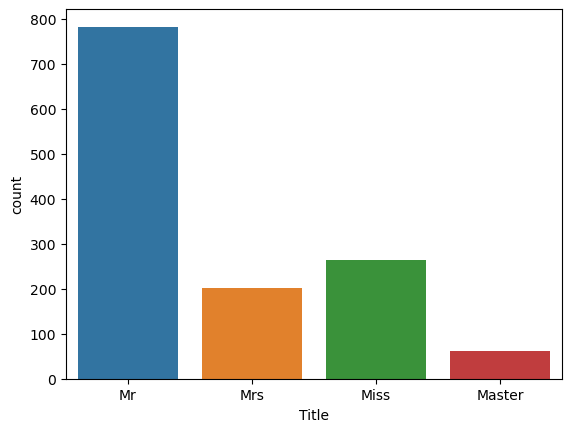

In [48]:
sns.countplot(x=df['Title'])

In [44]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [49]:
df.groupby('Sex')["Age"].mean()

#erkelerin ve kadınların yaş ortalamaları

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [50]:
df.groupby('Title')["Age"].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [51]:
df["Age"]=df["Age"].fillna(df.groupby('Title')["Age"].transform('median'))
# transform = ortalamaları bulup gerekli yerkere doldurmak için
#boş olan yaş değerleri ortalamalarına göre doldur

In [52]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [53]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
24,916,NaN,1,female,48.0,1,3,PC 17608,262.375,C,Mrs


In [54]:
df.drop(["PassengerId","Ticket"],axis=1,inplace=True)

#etkisi olmayan sütunları sildik

In [55]:
df["Family"]=df['SibSp']+df['Parch']+1

#aile diye yeni bir sütun tanımladık. aile ile kardeş sayısının toplamı+1

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [57]:
data=pd.get_dummies(df,drop_first=True)

#yazıları sayıya çevirdik
#df yerine data kullandık. df nin orjinali bozulmasın kalsın diye 

In [58]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [59]:
data.to_csv('titanichazirveri')

In [60]:
train=data[:891]
test=data[891:]

In [61]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [62]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1


In [66]:
del test['Survived']

In [67]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,3,0,0,1,0,0,1


In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier



gb=GradientBoostingClassifier()
d=DecisionTreeClassifier()
g=GaussianNB()
b=BernoulliNB()
lr=LogisticRegression()
r=RandomForestClassifier()

In [64]:
model=d.fit(x,y)

In [68]:
tahmin=model.predict(test)

In [62]:
sonuc=pd.DataFrame()

In [70]:
sonuc=df2[['PassengerId']]
sonuc['Survived']=tahmin

C:\Users\user\AppData\Local\Temp\ipykernel_1476\3034117781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=tahmin


In [71]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [72]:
sonuc['Survived']=sonuc['Survived'].astype('int32')

C:\Users\user\AppData\Local\Temp\ipykernel_1476\699227836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=sonuc['Survived'].astype('int32')


In [74]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [75]:
sonuc.to_csv('022titanictahmin.csv',index=False)

#sonucu kaydederken en baştaki index i siler
#bu sonucu kaggle kaydetmek gerekiyor yaptığın tahmine göre not veriyor


In [77]:
lr=LogisticRegression()

In [86]:
model1=lr.fit(x,y)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
tahmin1=model1.predict(test)

In [88]:
sonuc1=pd.DataFrame()

In [89]:
sonuc1['PassengerId']=df2['PassengerId']
sonuc1['Survived']=tahmin

In [90]:
sonuc1

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [97]:
sonuc1['Survived']=sonuc1['Survived'].astype('int32')

In [98]:
sonuc1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [123]:
sonuc1.to_csv('022titanictahmin-lr.csv',index=False)

In [83]:
g=GaussianNB()
b=BernoulliNB()

In [91]:
model2=g.fit(x,y)

In [93]:
tahmin2=model2.predict(test)

In [94]:
sonuc2=pd.DataFrame()

In [95]:
sonuc2['PassengerId']=df2['PassengerId']
sonuc2['Survived']=tahmin

In [96]:
sonuc2

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [99]:
sonuc2['Survived']=sonuc2['Survived'].astype('int32')

In [124]:
sonuc2.to_csv('022titanictahmin-g.csv',index=False)

In [100]:
model3=b.fit(x,y)

In [101]:
tahmin3=model3.predict(test)

In [102]:
sonuc3=pd.DataFrame()

In [104]:
sonuc3['PassengerId']=df2['PassengerId']
sonuc3['Survived']=tahmin

In [105]:
sonuc3['Survived']=sonuc2['Survived'].astype('int32')

In [125]:
sonuc3.to_csv('022titanictahmin-b.csv',index=False)

In [111]:
model4=r.fit(x,y)

In [112]:
tahmin4=model4.predict(test)

In [113]:
sonuc4=pd.DataFrame()

In [114]:
sonuc4['PassengerId']=df2['PassengerId']
sonuc4['Survived']=tahmin

In [115]:
sonuc4['Survived']=sonuc2['Survived'].astype('int32')

In [126]:
sonuc4.to_csv('022titanictahmin-r.csv',index=False)

In [116]:
model5=gb.fit(x,y)

In [117]:
tahmin5=model5.predict(test)

In [118]:
sonuc5=pd.DataFrame()

In [119]:
sonuc5['PassengerId']=df2['PassengerId']
sonuc5['Survived']=tahmin

In [120]:
sonuc5['Survived']=sonuc2['Survived'].astype('int32')

In [122]:
sonuc5.to_csv('022sontitanictahmin.csv',index=False)

#sonucu kaydederken en baştaki index i siler
#bu sonucu kaggle kaydetmek gerekiyor yaptığın tahmine göre not veriyor